# Global conservation status of palms: where we are and what we need to achieve

We shall extract data from IUCN and generate a bunch of grapichs
Then undertake a spatial analyses using ConR from data taken from GBIF

## Extract IUCN redlist data, species already assessed

In [2]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np

### Access via API

In [12]:
#not workin for family level

# you need to ask for a token via the website https://apiv3.iucnredlist.org/
#my Thomas Token: 
#  12ea6779b92025d3c9091c76a5eeb0915a7a037f1da3dde109444400d69f7640

URL = "https://apiv3.iucnredlist.org/api/v3/species/monodora?token=12ea6779b92025d3c9091c76a5eeb0915a7a037f1da3dde109444400d69f7640"
pd.read_json(URL)

,name,result


### Access via csv file downloaded from REDLIST

In [88]:
myfile = 'assessments.csv'
doc = codecs.open(myfile,'rU','UTF-8') #open for reading with "universal" type set
df = pd.read_csv(doc, sep=',')

#delete assessements with version 2.8 (keep only 3.1 versions)

df = df.query("criteriaVersion == 3.1")
df = df.reset_index(drop=True)

In [89]:
df.head(3)

,assessmentId,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,...,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,1494216,177600,Balaka streptostachys,Critically Endangered,"C2a(i,ii)",2017,2017-05-03 00:00:00 UTC,3.1,English,This species is endemic to Fiji. Its populatio...,...,Decreasing,This species is only known from a single site ...,There is no known or recorded use.,Terrestrial,This species is not recorded in any known <em>...,Oceanian,NaN,False,False,Global
1,1494228,177602,Heterospathe phillipsii,Endangered,"B1ab(i,ii,iii)+2ab(i,ii,iii)",2017,2017-05-03 00:00:00 UTC,3.1,English,This species endemic to Fiji and is known only...,...,Unknown,"This species is known only from three small, r...",The palm heart is edible and the immature seed...,Terrestrial,There are three known <em>ex situ</em> collect...,Oceanian,NaN,False,False,Global
2,1494234,177603,Hydriastele boumae,Least Concern,NaN,2017,2017-05-04 00:00:00 UTC,3.1,English,This species is endemic to the Island of Taveu...,...,Unknown,This is a Fiji-endemic that only occurs on the...,There is no use reported.,Terrestrial,The landowners of the Bouma community have set...,Oceanian,NaN,False,False,Global


## Basic data exploration

### Create a column with genus name

In [90]:
df[['Genus', 'epithet']] = df['scientificName'].str.split(' ', 1, expand=True)
df.head(3)

,assessmentId,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,...,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes,Genus,epithet
0,1494216,177600,Balaka streptostachys,Critically Endangered,"C2a(i,ii)",2017,2017-05-03 00:00:00 UTC,3.1,English,This species is endemic to Fiji. Its populatio...,...,There is no known or recorded use.,Terrestrial,This species is not recorded in any known <em>...,Oceanian,NaN,False,False,Global,Balaka,streptostachys
1,1494228,177602,Heterospathe phillipsii,Endangered,"B1ab(i,ii,iii)+2ab(i,ii,iii)",2017,2017-05-03 00:00:00 UTC,3.1,English,This species endemic to Fiji and is known only...,...,The palm heart is edible and the immature seed...,Terrestrial,There are three known <em>ex situ</em> collect...,Oceanian,NaN,False,False,Global,Heterospathe,phillipsii
2,1494234,177603,Hydriastele boumae,Least Concern,NaN,2017,2017-05-04 00:00:00 UTC,3.1,English,This species is endemic to the Island of Taveu...,...,There is no use reported.,Terrestrial,The landowners of the Bouma community have set...,Oceanian,NaN,False,False,Global,Hydriastele,boumae


### Get number of species assessed

In [91]:
print('The total number of palm species assessed:',len(df.index), '; and the number of genera is:', len(pd.unique(df['Genus'])))

The total number of palm species assessed: 592 ; and the number of genera is: 108


### List of species assessed

In [92]:
sp = pd.unique(df['scientificName'])
#sp

### Min and Max year of assessements

In [155]:
yr = df["yearPublished"]

print('The oldest assessements are from:', yr.min(), '; and the youngests are from:', yr.max())

The oldest assessements are from: 2003 ; and the youngests are from: 2021


## Count number of species in different threat categories and generate a pie chart

In [95]:
red = df['redlistCategory'].value_counts() #this returns a series
red_df = red.to_frame() #covert to a dataframe
red_df

,redlistCategory
Least Concern,201
Critically Endangered,112
Endangered,110
Vulnerable,77
Data Deficient,47
Near Threatened,44
Extinct,1


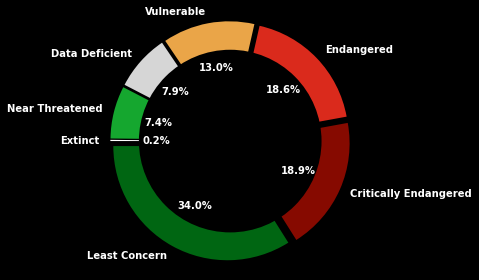

In [154]:
#pie chart

#get labels
rdcat = red_df["redlistCategory"]

index = red_df.index
labels = list(index)

# distance between pies if needed, used with "explode=explode" in script below
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)  # only "explode" the 1st slice (i.e. 'Least Concern')

#get sizes

sizes = red_df["redlistCategory"]

# pie colors from IUCN: https://www.withoutnations.com/portfolio/iucn-red-list/; order as in dataframe
colors = ['#006612','#860A00','#DA2A1C', '#EAA548', '#D6D6D6', '#15A72F', '#FFFFFF']

#pie plot script; we can change the position of labels 
#(both outer and percent labels) by modifying labeldistance(defaul:1) and pctdistance(default:0.6); textprops give the text white color

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=False, startangle=180, textprops={'color':"w", 'weight':'bold'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#draw a black circle in the middle
centre_circle = plt.Circle((0,0),0.80,fc='black')
fig = plt.gcf()

#define background color of fig space
fig.patch.set_facecolor('black')
fig.gca().add_artist(centre_circle)

# print and view chart
plt.tight_layout()
#plt.show()
plt.savefig('pie_palms.png', bbox_inches='tight', dpi=500)

## Stacked bar plot per realm / threat

In [262]:
# oupby bot values and ten size to count total for eac cat; ere we group by realm and count total per redlistcateory
gkk = df.groupby(['realm', 'redlistCategory']).size()
#gkk

In [292]:
#get values of number of threats per realm and generate an unstacked dataframe
RL = df.groupby(['realm', 'redlistCategory']).size().unstack()

#so of the values will ne NaN and create an error later on, fillna allows us to fill in the NaN with 0
RL = RL.fillna(0)

#transforme values into % and ound off to entire number
#RL = stacked_data = RL.apply(lambda x: x*100/sum(x), axis=1)
#RL = RL.round(decimals=0)

#merge threatened categoris together and not threatened

RL['Threatened'] = RL['Critically Endangered'] + RL['Endangered'] + RL['Vulnerable'] + RL['Extinct']
RL['Not threatened'] = RL['Least Concern'] + RL['Near Threatened'] + RL['Data Deficient']

#we shall drop multiple realms
RL = RL.drop(['Australasian|Indomalayan', 'Australasian|Indomalayan|Oceanian', 'Indomalayan|Palearctic', 'Nearctic|Neotropical', 'Afrotropical|Neotropical'])

RL

redlistCategory,Critically Endangered,Data Deficient,Endangered,Extinct,Least Concern,Near Threatened,Vulnerable,Threatened,Not threatened
realm,,,,,,,,,
Afrotropical,67.0,22.0,48.0,0.0,62.0,18.0,45.0,160.0,102.0
Australasian,5.0,17.0,14.0,0.0,43.0,9.0,3.0,22.0,69.0
Indomalayan,14.0,6.0,12.0,0.0,20.0,8.0,5.0,31.0,34.0
Nearctic,0.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,4.0
Neotropical,10.0,1.0,22.0,1.0,44.0,7.0,16.0,49.0,52.0
Oceanian,13.0,1.0,10.0,0.0,8.0,2.0,3.0,26.0,11.0
Palearctic,3.0,0.0,4.0,0.0,2.0,0.0,2.0,9.0,2.0


### Bar plot

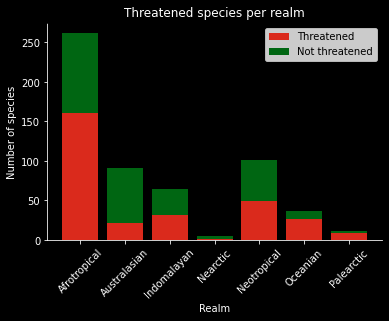

In [343]:
#colors: colors = ['#DA2A1C','#006612']
#control colors etc with the different parameters

#define values
realm  = list(RL.index)
Threatened = RL["Threatened"]
Not_threatened = RL["Not threatened"]
width = 0.8

fig, ax = plt.subplots()

ax.bar(realm, Threatened, width,label='Threatened', color='#DA2A1C')
ax.bar(realm, Not_threatened, width, bottom=Threatened, label='Not threatened', color='#006612')

#define background color of fig space
fig.patch.set_facecolor('black')
ax.set_facecolor("black")

#set specific values for ax
ax.set_ylabel('Number of species', color='w')
ax.set_xlabel('Realm', color='w')
ax.set_title('Threatened species per realm', color='w')

#set label colors and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines["left"].set_color("white")
ax.spines["bottom"].set_color("white")

ax.legend()

#change rotation of x labels:
plt.xticks(rotation=45)

#plt.show()
plt.savefig('threat.png', bbox_inches='tight', dpi=500)

In [ ]:
# alternative way, less options

# colors from IUCN: https://www.withoutnations.com/portfolio/iucn-red-list/; order as in dataframe
colors = ['#DA2A1C','#006612']
#width = 0.35

RL[['Threatened','Not threatened']].plot(kind='bar', stacked=True, color=colors, width=0.9, ylabel='Number of species')

plt.savefig('threat.png', bbox_inches='tight', dpi=500, facecolor = 'white')

## Import gbif data of palms and clean

### Import csv of palm distribution data

In [ ]:
#pip install psycopg2 #to use postres SQL 

In [120]:
myfile2 = 'palms_gbif_25052021.csv'
doc2 = codecs.open(myfile2,'rU','UTF-8') #open for reading with "universal" type set
ds = pd.read_csv(doc2, sep='\t')

In [18]:
#list(ds.columns)

### Different cleaning steps

In [122]:
#delete none essential columns
ds2 = ds.drop(ds.columns[[1,3,4,5,6,7,19,20,23,24,26,27,28,35,42,43,45,46,47,48,49]], axis=1)
ds2.head(5)

,gbifID,occurrenceID,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,...,year,taxonKey,speciesKey,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,recordedBy
0,1638731776,WCSColombia:2015_PNN_SSL:PlantasOC:1234,Geonoma,Geonoma stricta,NaN,SPECIES,Geonoma stricta (Poit.) Kunth,Geonoma stricta (Poit.) Kunth,(Poit.) Kunth,CO,...,2015.0,2734102,2734102.0,WCS Colombia,JAUM,TJP: 1234,PlantasOC:1234,Juan Pablo Tobón,2015-05-02T00:00:00,Juan Pablo Tobón
1,1638731823,WCSColombia:2015_PNN_SSL:PlantasC1800:0239,Geonoma,Geonoma chlamydostachys,NaN,SPECIES,Geonoma chlamydostachys Galeano,Geonoma chlamydostachys Galeano,Galeano,CO,...,2015.0,2734322,2734322.0,WCS Colombia,TOLI,239,PlantasC1800:0239,Boris Villanueva,2015-07-24T00:00:00,Boris Villanueva
2,1638731820,WCSColombia:2015_PNN_SSL:PlantasOC:1226,Phytelephas,Phytelephas macrocarpa,NaN,SPECIES,Phytelephas macrocarpa Ruiz & Pav.,Phytelephas macrocarpa Ruiz & Pav.,Ruiz & Pav.,CO,...,2015.0,2736300,2736300.0,WCS Colombia,JAUM,TJP: 1226,PlantasOC:1226,Juan Pablo Tobón,2015-05-02T00:00:00,Juan Pablo Tobón
3,1638731817,WCSColombia:2015_PNN_SSL:PlantasOC:1201,Attalea,Attalea nucifera,NaN,SPECIES,Attalea nucifera H.Karst.,Attalea nucifera H. Karst.,H. Karst.,CO,...,2015.0,2732819,2732819.0,WCS Colombia,JAUM,TJP: 1201,PlantasOC:1201,Juan Pablo Tobón,2015-05-02T00:00:00,Juan Pablo Tobón
4,1638731870,WCSColombia:2015_PNN_SSL:PlantasOC:1280,Bactris,Bactris pilosa,NaN,SPECIES,Bactris pilosa H.Karst.,Bactris pilosa H. Karst.,H. Karst.,CO,...,2015.0,2733324,2733324.0,WCS Colombia,JAUM,TJP: 1280,PlantasOC:1280,Juan Pablo Tobón,2015-05-02T00:00:00,Juan Pablo Tobón


#### Select rows identified to species level only

In [123]:
sp_ds = ds2.loc[ds2['taxonRank'] == "SPECIES"]
#sp_ds.taxonRank.unique() 
sp_ds.head(5)

,gbifID,occurrenceID,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,...,year,taxonKey,speciesKey,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,recordedBy
0,1638731776,WCSColombia:2015_PNN_SSL:PlantasOC:1234,Geonoma,Geonoma stricta,NaN,SPECIES,Geonoma stricta (Poit.) Kunth,Geonoma stricta (Poit.) Kunth,(Poit.) Kunth,CO,...,2015.0,2734102,2734102.0,WCS Colombia,JAUM,TJP: 1234,PlantasOC:1234,Juan Pablo Tobón,2015-05-02T00:00:00,Juan Pablo Tobón
1,1638731823,WCSColombia:2015_PNN_SSL:PlantasC1800:0239,Geonoma,Geonoma chlamydostachys,NaN,SPECIES,Geonoma chlamydostachys Galeano,Geonoma chlamydostachys Galeano,Galeano,CO,...,2015.0,2734322,2734322.0,WCS Colombia,TOLI,239,PlantasC1800:0239,Boris Villanueva,2015-07-24T00:00:00,Boris Villanueva
2,1638731820,WCSColombia:2015_PNN_SSL:PlantasOC:1226,Phytelephas,Phytelephas macrocarpa,NaN,SPECIES,Phytelephas macrocarpa Ruiz & Pav.,Phytelephas macrocarpa Ruiz & Pav.,Ruiz & Pav.,CO,...,2015.0,2736300,2736300.0,WCS Colombia,JAUM,TJP: 1226,PlantasOC:1226,Juan Pablo Tobón,2015-05-02T00:00:00,Juan Pablo Tobón
3,1638731817,WCSColombia:2015_PNN_SSL:PlantasOC:1201,Attalea,Attalea nucifera,NaN,SPECIES,Attalea nucifera H.Karst.,Attalea nucifera H. Karst.,H. Karst.,CO,...,2015.0,2732819,2732819.0,WCS Colombia,JAUM,TJP: 1201,PlantasOC:1201,Juan Pablo Tobón,2015-05-02T00:00:00,Juan Pablo Tobón
4,1638731870,WCSColombia:2015_PNN_SSL:PlantasOC:1280,Bactris,Bactris pilosa,NaN,SPECIES,Bactris pilosa H.Karst.,Bactris pilosa H. Karst.,H. Karst.,CO,...,2015.0,2733324,2733324.0,WCS Colombia,JAUM,TJP: 1280,PlantasOC:1280,Juan Pablo Tobón,2015-05-02T00:00:00,Juan Pablo Tobón


In [124]:
print('There are', len(sp_ds.index),'records identifed to species level')

There are 104852 records identifed to species level


#### Check to see if some records do not have coordinates

In [125]:
print('There are', sp_ds.decimalLatitude.isna().sum(), sp_ds.decimalLongitude.isna().sum(),'records with no coordinates')

There are 0 0 records with no coordinates


#### We shall delete the rows that do ot have a collector name (unknown, no disponible, NaN)

In [127]:
#here we can count the number of such occurences

(sp_ds['recordedBy'].values == 'NO DISPONIBLE').sum()

115

In [130]:
#number of unknown collectors with NaN

sp_ds['recordedBy'].isnull().sum()

1461

In [131]:
#drop values with unknown collectors

sp_ds1 = sp_ds[(sp_ds.recordedBy != 'unknown') & (sp_ds.recordedBy != 'Unknown') & (sp_ds.recordedBy != 'NO DISPONIBLE') & sp_ds['recordedBy'].notnull()]

In [132]:
len(sp_ds1.index)

103207

In [137]:
#count number of unique collectors
col_unique = sp_ds1.groupby('recordedBy')['recordedBy'].count()
len(col_unique.index)

19148

#### Create a new df with no duplicates; find duplicates with countryCode, recordNumber and year

In [145]:
unique_spe = sp_ds1.drop_duplicates(subset=['year', 'countryCode', 'recordNumber', 'decimalLongitude', 'species','recordedBy'])

print('There are', len(unique_spe.index), 'records and', len(unique_spe.species.unique()), 'species')

There are 77950 records and 2183 species


In [146]:
#count duplicates of recordedBy and recordNumber

dups_recordedBy_recordNumber = unique_spe.pivot_table(index=['recordedBy','recordNumber'], aggfunc='size')
print (dups_recordedBy_recordNumber)
#dups_recordedBy_recordNumber.head(70)

recordedBy                             recordNumber          
(n/a)                                  781                       1
* BAKER                                BAKER 1028                1
* BYG                                  BYG 2                     1
                                       BYG 22                    1
* DAN TURK|J. Randrianasolo|M. Rajoma  DAN TURK 709              1
                                                                ..
Émile Hassler                          Hassler 3761              1
Évrard C.                              1890                      1
Óscar Valverde                         Valverde Barrantes 773    1
                                       Valverde Barrantes 782    1
                                       Valverde Barrantes 993    1
Length: 59013, dtype: int64


#### Create a new column with only numbers extracted from recordNumber using Regex

In [103]:
#import regex
import re

In [147]:
#extract only number from recordNumber and put it in a new column called col_number

def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

unique_spe['recordNumber']=unique_spe['recordNumber'].fillna('').apply(str)

unique_spe['col_number'] = unique_spe['recordNumber'].apply(lambda x: find_number(x))

<ipython-input-147-7ac1f762056c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_spe['recordNumber']=unique_spe['recordNumber'].fillna('').apply(str)
<ipython-input-147-7ac1f762056c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_spe['col_number'] = unique_spe['recordNumber'].apply(lambda x: find_number(x))


In [154]:
unique_spe.tail(5)

,gbifID,occurrenceID,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,...,taxonKey,speciesKey,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,recordedBy,col_number
130889,1094173263,BRA:UESC:UESC:9874,Syagrus,Syagrus schizophylla,NaN,SPECIES,Syagrus schizophylla (Mart.) Glassman,Syagrus schizophylla,NaN,BR,...,5293907,5293907.0,UESC,UESC,9874,1517,NaN,NaN,"Jesus, N.G.",1517
130890,1094173265,BRA:UESC:UESC:9832,Allagoptera,Allagoptera arenaria,NaN,SPECIES,Allagoptera arenaria (Gomes) Kuntze,Allagoptera arenaria,Kuntze,BR,...,2732040,2732040.0,UESC,UESC,9832,1547,NaN,NaN,"Jesus, N.G.",1547
130891,1094177008,BRA:UESC:UESC:16326,Attalea,Attalea funifera,NaN,SPECIES,Attalea funifera Mart.,Attalea funifera,Martius,BR,...,2732833,2732833.0,UESC,UESC,16326,1,L.A.Mattos-Silva,2013-12-01T00:00:00,"Noara M.Pimentel,",1
130892,1094173229,BRA:UESC:UESC:9814,Allagoptera,Allagoptera arenaria,NaN,SPECIES,Allagoptera arenaria (Gomes) Kuntze,Allagoptera arenaria,Kuntze,BR,...,2732040,2732040.0,UESC,UESC,9814,4857,NaN,NaN,L.A.Mattos Silva,4857
130893,1094177056,BRA:UESC:UESC:16356,Desmoncus,Desmoncus polyacanthos,NaN,SPECIES,Desmoncus polyacanthos Mart.,Desmoncus polyacanthos,NaN,BR,...,2738831,2738831.0,UESC,UESC,16356,4,C.N. Daltrini,2014-02-01T00:00:00,"Daltrini, C.N.",4


#### A new filter on same col_number and collector

In [156]:
unique_spe1 = unique_spe.drop_duplicates(subset=['recordedBy', 'col_number'])

print('There are', len(unique_spe_red1.index), 'records and', len(unique_spe_red1.species.unique()), 'species')

There are 66107 records and 2142 species


#### Write fitered dataframe to csv but select only essential columns

In [162]:
unique_spe_red = unique_spe1[["recordedBy", "col_number", "species", "decimalLongitude", "decimalLatitude", "countryCode", "year"]]
unique_spe_red.to_csv("unique_spe_palms.csv")

,recordedBy,col_number,species,decimalLongitude,decimalLatitude,countryCode,year
0,Juan Pablo Tobón,1234,Geonoma stricta,-74.353806,7.122111,CO,2015.0
1,Boris Villanueva,1800 0239,Geonoma chlamydostachys,-74.344222,7.677222,CO,2015.0
2,Juan Pablo Tobón,1226,Phytelephas macrocarpa,-74.353806,7.122111,CO,2015.0
3,Juan Pablo Tobón,1201,Attalea nucifera,-74.353806,7.122111,CO,2015.0
4,Juan Pablo Tobón,1280,Bactris pilosa,-74.353806,7.122111,CO,2015.0
5,Juan Pablo Tobón,1281,Ammandra decasperma,-74.353806,7.122111,CO,2015.0
6,Juan Pablo Tobón,1262,Wettinia hirsuta,-74.353806,7.122111,CO,2015.0
7,Juan Pablo Tobón,1247,Geonoma deversa,-74.353806,7.122111,CO,2015.0
12,"Vichith Lamxay, Lakhone Sithammachak, Bounkeut...",,Caryota mitis,105.456920,17.841920,LA,2008.0
13,"Kool, A., Boer, H.J. de, Lamxay, V., Insisieng...",,Calamus rudentum,105.339300,17.509100,LA,2006.0


## Plot data

In [41]:
from shapely.geometry import Point, mapping
from fiona import collection
from geopandas import GeoDataFrame
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona

### Create shape file using filtered dataset

In [164]:
data = unique_spe_red

geometry = [Point(xy) for xy in zip(data.decimalLongitude, data.decimalLatitude)]
crs = {'init': 'epsg:4326'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(data, crs=crs, geometry=geometry)

geo_df.to_file(driver='ESRI Shapefile', filename='palm_dist')

geo_especies = gpd.read_file("palm_dist/palm_dist.shp")

C:\Users\couvreur.MPLCLTPO0722\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-164-d2dee0dcb701>:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_df.to_file(driver='ESRI Shapefile', filename='palm_dist')


### Plot distribution using world map

Text(57.875, 0.5, 'Latitude')

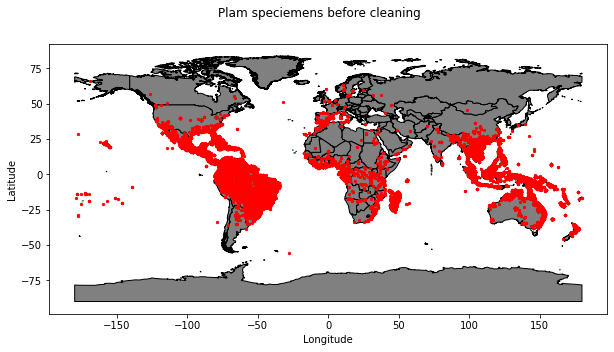

In [165]:
countries = gpd.read_file("./world_adm0.shp")

fig, ax = plt.subplots(figsize=(10,5))

countries.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1)

#You can use different 'cmaps' such as jet, plasm,magma, infereno,cividis, binary...(I simply chose cividis)

geo_especies.plot(ax=ax, color='red', markersize=5);

fig.suptitle('Plam speciemens before cleaning', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')